# 1-Loading Pickle Files

In [1]:
import pandas as pd
import os

#List of all pickle files
pklfiles = [f for f in os.listdir('processed') if os.path.isfile(os.path.join('processed', f)) and f.endswith('.pkl')]
print(pklfiles)

['ad-chega.pkl', 'ad-ps.pkl', 'il-be.pkl']


In [2]:
video = 'ad-chega'
data = pd.read_pickle(os.path.join('processed', video + '.pkl'))

#Print first lines
data.head() 

filename                                         detections  \
0  img00116.jpeg  [[0, 53, 620, 659, person, 0.93359375], [612, ...   
1  img01657.jpeg  [[87, 45, 740, 587, person, 0.94140625], [1069...   
2  img00589.jpeg  [[625, 31, 646, 686, person, 0.9375], [7, 38, ...   
3  img00264.jpeg  [[604, 101, 111, 133, person, 0.80078125], [15...   
4  img00070.jpeg  [[91, 29, 767, 660, person, 0.9375], [1051, 48...   

                                               poses  \
0  [[[0.6981924772262573, 0.41902482509613037, -0...   
1  [[[0.4402078092098236, 0.4400981664657593, -0....   
2  [[[0.28483036160469055, 0.3542748689651489, -0...   
3  [[[0.7193284034729004, 0.27134227752685547, -0...   
4  [[[0.480089008808136, 0.362809419631958, -0.58...   

                                               faces  \
0  [[[0.6962661743164062, 0.477009117603302, -0.0...   
1  [[[0.4418838918209076, 0.499070942401886, -0.0...   
2  [[[0.6996282339096069, 0.436468243598938, -0.0...   
3                                                 []   
4  [[[0.47768157720565796, 0.4398738145828247, -0...   

                                                text  \
0      [3, {2624, MONTYISGRO, O1:02, OO:OO, vÊNPBRA]   
1  [=3, 9, [2624, MONHYIEGRO, 13.20, 13.05, vÊNPB...   
2   [3, 82624, MONHYIEGRO, 03.48, 03.58, vÊNPBIA, 9]   
3         [23, 9, MONHYÍEGRO, 02.56, OO:OO, vÊNPBRA]   
4  [=3, 9, {2624, MONTYIEGRO, 00:16, OO:OO, vÊNPB...   

                                           embedding  \
0  [1, 2, 1, 0, 254, 253, 254, 255, 4, 12, 253, 1...   
1  [0, 253, 253, 253, 254, 253, 1, 255, 0, 18, 25...   
2  [253, 1, 0, 255, 254, 253, 255, 255, 4, 7, 254...   
3  [253, 254, 4, 254, 2, 253, 1, 253, 1, 2, 0, 1,...   
4  [0, 0, 0, 0, 254, 253, 1, 255, 5, 18, 0, 9, 3,...   

                                                 fer  
0  [{'location': [773, 1055, 129, 412], 'embeddin...  
1  [{'location': [344, 655, 133, 445], 'embedding...  
2  [{'location': [166, 459, 91, 384], 'embedding'...  
3  [{'location': [1120, 1188, 507, 576], 'embeddi...  
4  [{'location': [404, 688, 105, 389], 'embedding...

# 2-Extracting the embedded vectors of every frame 

In [3]:
import numpy as np


embeddings_list = []


for index, row in data.iterrows():
    
    embedding = row['embedding']
    embeddings_list.append(embedding)

#Convert the list of embeddings to a numpy array
embeddings_array = np.array(embeddings_list)


print(embeddings_array)

[[  1   2   1 ...   8   0   0]
 [  0 253 253 ...   6 255   3]
 [253   1   0 ...   2 255   5]
 ...
 [254 254   5 ... 254 254 254]
 [253   3   1 ... 255 254   1]
 [  0 254   0 ...   5 255   2]]


# 3-Usage of Hirarchical Clustering on the embedded vectors previously mentioned

In [4]:
from sklearn.cluster import AgglomerativeClustering
#Ad-chega - 5 , ad-ps - 8

num_clusters = 5
hierarchical_clusterer = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = hierarchical_clusterer.fit_predict(embeddings_array)

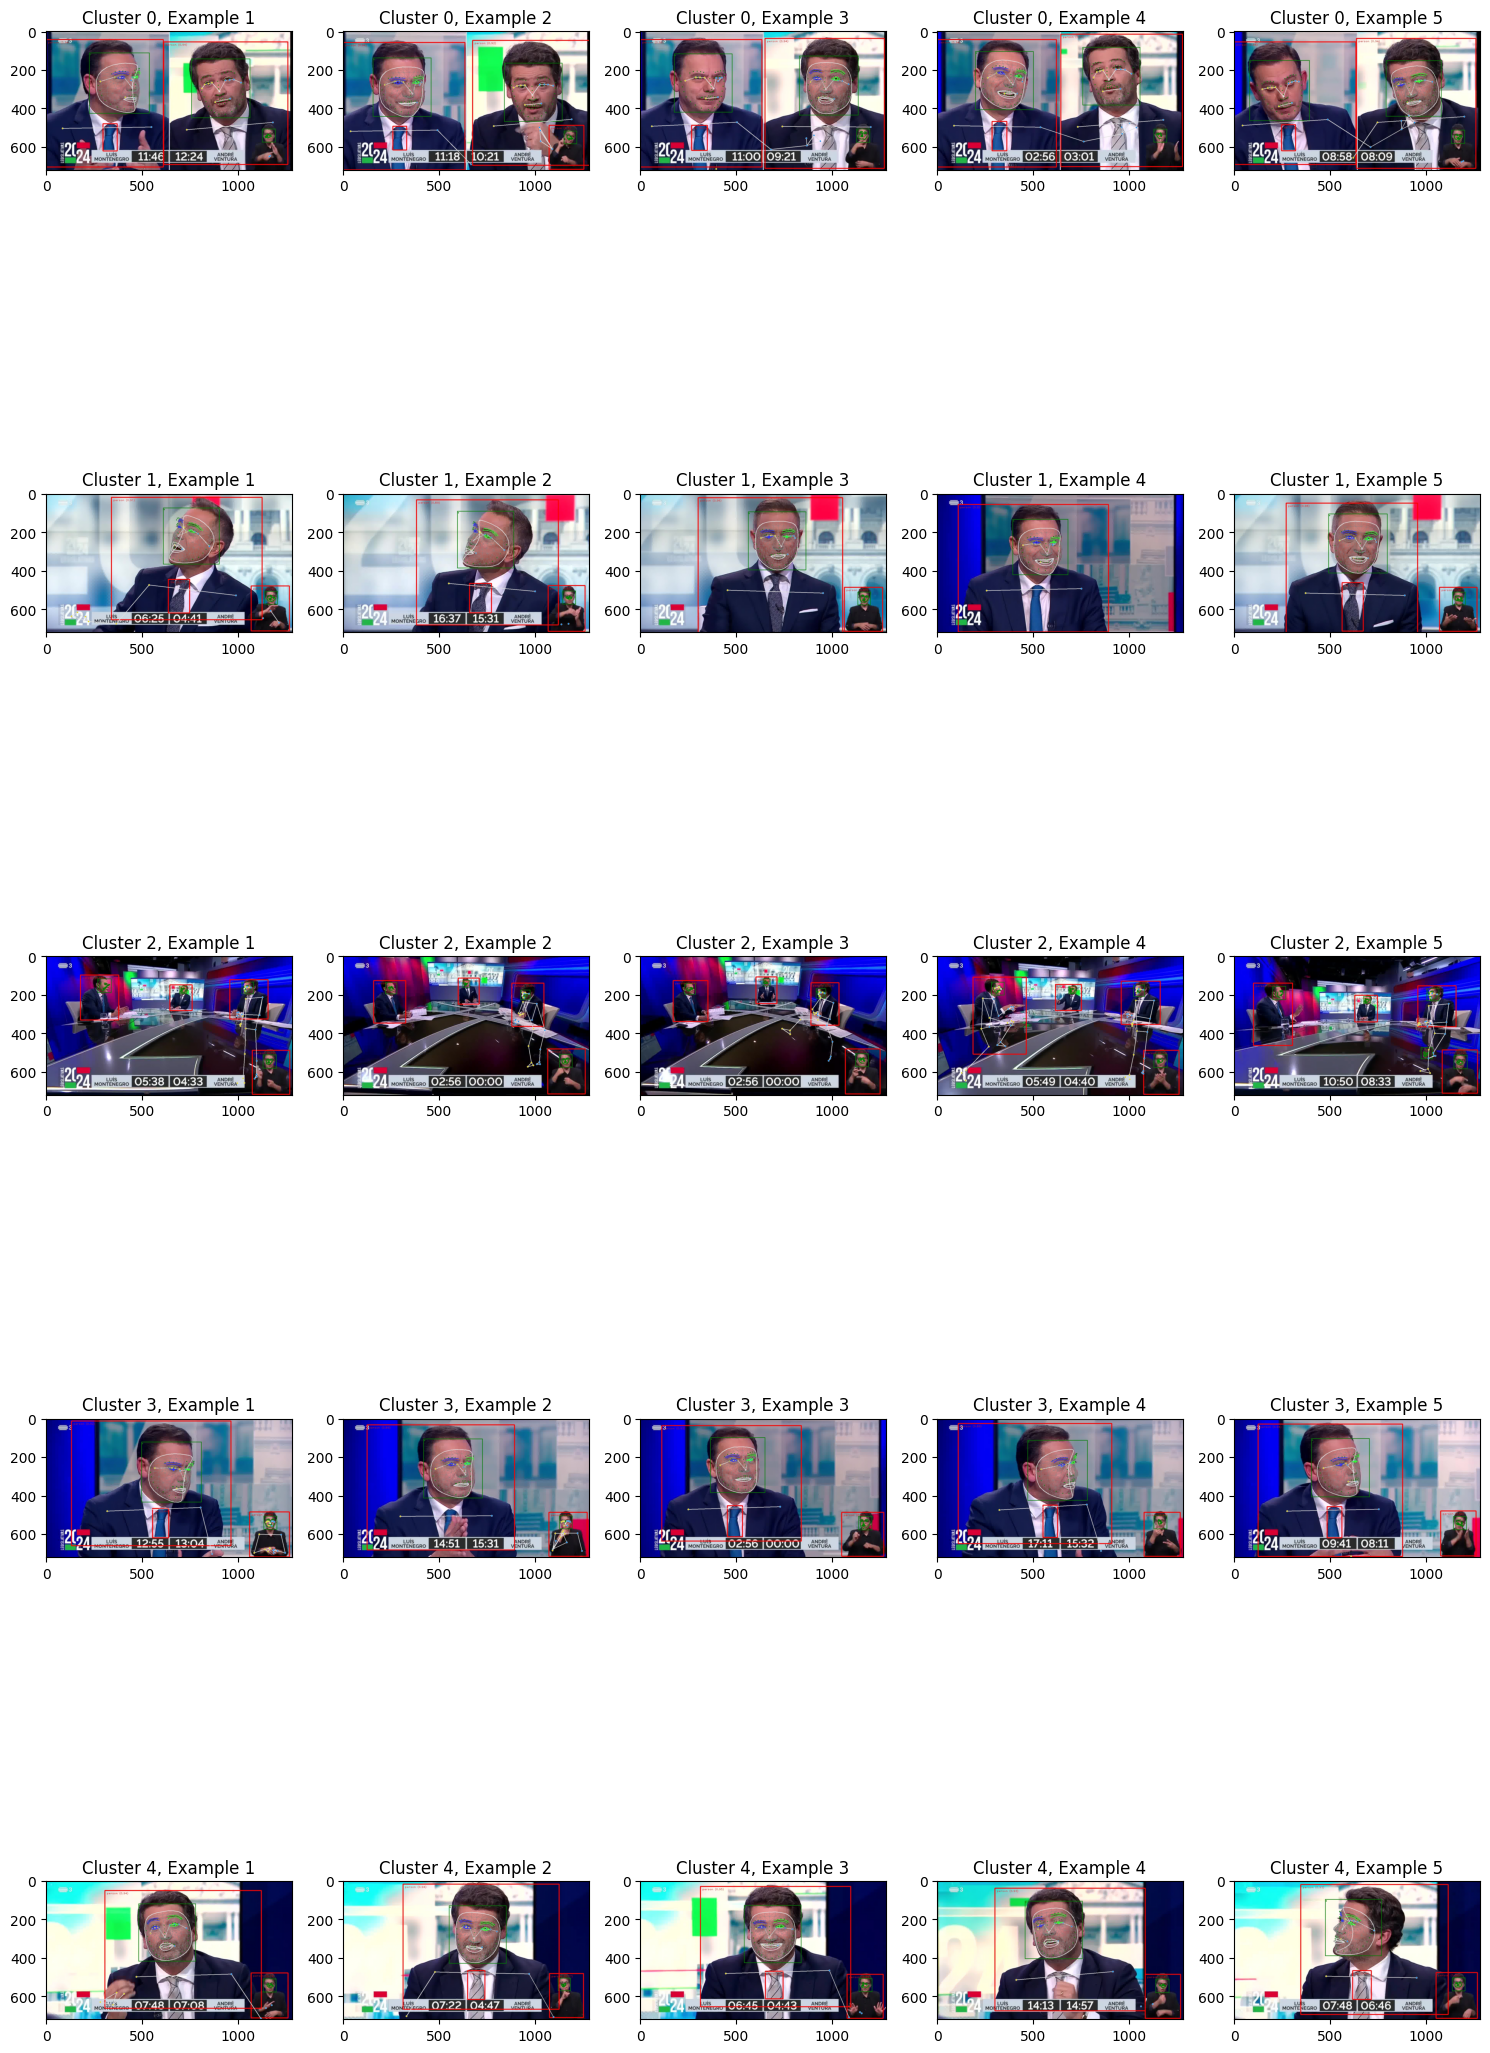

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random


num_images_per_cluster = 5


unique_clusters = np.unique(cluster_labels)

plt.figure(figsize=(15, 5 * len(unique_clusters)))


for i, cluster in enumerate(unique_clusters):

    indices = np.where(cluster_labels == cluster)[0]
    
    #Select 5 random indices from the current cluster
    random_indices = np.random.choice(indices, min(num_images_per_cluster, len(indices)), replace=False)
    

    for j, index in enumerate(random_indices):
        
        filename = data.iloc[index]['filename']
        
        
        image = plt.imread(os.path.join(r'C:\Users\User\Desktop\PBD\Code\processed\ad-chega', filename))
        
        plt.subplot(len(unique_clusters), num_images_per_cluster, i * num_images_per_cluster + j + 1)
        plt.imshow(image)
        plt.title(f'Cluster {cluster}, Example {j+1}')
        plt.axis('on')

plt.tight_layout()
plt.show()

#  4-Getting the location in the fer row for every cluster

In [12]:

# Extract bounding box coordinates from the 'fer' column for cluster 0 frames
def extract_bounding_boxes(row):
    locations = []
    for face_data in row['fer']:
        location = face_data['location']
        locations.append(location)
    return locations

# Apply the function to extract bounding boxes
data['bounding_boxes'] = data.apply(extract_bounding_boxes, axis=1)

# Filter data for Cluster 0
cluster_0_indices = np.where(cluster_labels == 0)[0]
cluster_0_data = data.iloc[cluster_0_indices]

# Check extracted bounding boxes
print(cluster_0_data['bounding_boxes'].head())


cluster_1_indices = np.where(cluster_labels == 1)[0]
cluster_1_data = data.iloc[cluster_1_indices]


#print("Bounding boxes for Cluster 1:")
print(cluster_1_data['bounding_boxes'].head())


cluster_2_indices = np.where(cluster_labels == 2)[0]
cluster_2_data = data.iloc[cluster_2_indices]


#print("Bounding boxes for Cluster 2:")
print(cluster_2_data['bounding_boxes'].head())


cluster_3_indices = np.where(cluster_labels == 3)[0]
cluster_3_data = data.iloc[cluster_3_indices]


#("Bounding boxes for Cluster 3:")
print(cluster_3_data['bounding_boxes'].head())


cluster_4_indices = np.where(cluster_labels == 4)[0]
cluster_4_data = data.iloc[cluster_4_indices]


#print("Bounding boxes for Cluster 4:")
print(cluster_4_data['bounding_boxes'].head())

0     [[773, 1055, 129, 412], [202, 500, 117, 416], ...
2     [[166, 459, 91, 384], [768, 1076, 104, 412], [...
7     [[177, 480, 124, 427], [809, 1099, 105, 395], ...
10    [[164, 467, 101, 404], [763, 1045, 94, 377], [...
13    [[153, 453, 104, 404], [724, 1026, 134, 437], ...
Name: bounding_boxes, dtype: object
Bounding boxes for Cluster 1:
9     [[573, 875, 113, 415], [1139, 1212, 507, 580]]
11    [[396, 706, 124, 435], [1135, 1202, 508, 576]]
15     [[342, 654, 91, 403], [1144, 1213, 507, 577]]
28      [[220, 492, 139, 411], [728, 998, 128, 398]]
41    [[588, 878, 211, 501], [1135, 1203, 512, 580]]
Name: bounding_boxes, dtype: object
Bounding boxes for Cluster 2:
3     [[1120, 1188, 507, 576], [229, 287, 145, 203],...
14    [[1117, 1184, 506, 574], [1014, 1065, 191, 243...
24    [[1130, 1200, 507, 577], [191, 263, 152, 224],...
32    [[1129, 1197, 505, 574], [1020, 1073, 185, 238...
40    [[1023, 1086, 168, 232], [216, 286, 161, 232],...
Name: bounding_boxes, dtype: object
Boundin

# 5-Atribui as labels conforme as locations (para cada cluster)

In [21]:
# Function to label speakers based on bounding box positions for Cluster 0
def label_speakers_cluster_0(bounding_boxes):
    # Sort the bounding boxes by x1 coordinate (from left to right)
    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])
    print(f"Sorted boxes: {sorted_boxes}")
    labels = ['Montenegro', 'André', 'Sign Prof']  # Assuming 3 bounding boxes
    return labels


cluster_0_data = cluster_0_data.copy()
cluster_0_data.loc[:, 'labels'] = cluster_0_data['bounding_boxes'].apply(label_speakers_cluster_0)

# Verificar os dados rotulados para o Cluster 0
print(cluster_0_data[['bounding_boxes', 'labels']].head())


def label_speakers_cluster_1(bounding_boxes):

    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])
    print(f"Sorted boxes: {sorted_boxes}")
    labels = ['Comentador', 'Sign Prof'] 
    return labels


cluster_1_data = cluster_1_data.copy()  
cluster_1_data.loc[:, 'labels'] = cluster_1_data['bounding_boxes'].apply(label_speakers_cluster_1)


print(cluster_1_data[['bounding_boxes', 'labels']].head())


def label_speakers_cluster_2(bounding_boxes):

    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])
    print(f"Sorted boxes: {sorted_boxes}")
    labels = ['Montenegro', 'Comentador', 'André', 'Sign Prof']  
    return labels


cluster_2_data = cluster_2_data.copy() 
cluster_2_data.loc[:, 'labels'] = cluster_2_data['bounding_boxes'].apply(label_speakers_cluster_2)


print(cluster_2_data[['bounding_boxes', 'labels']].head())


def label_speakers_cluster_3(bounding_boxes):

    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])
    print(f"Sorted boxes: {sorted_boxes}")
    labels = ['Montenegro', 'Sign Prof']  
    return labels


cluster_3_data = cluster_3_data.copy()  
cluster_3_data.loc[:, 'labels'] = cluster_3_data['bounding_boxes'].apply(label_speakers_cluster_3)


print(cluster_3_data[['bounding_boxes', 'labels']].head())


def label_speakers_cluster_4(bounding_boxes):

    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])
    print(f"Sorted boxes: {sorted_boxes}")
    labels = ['Moderador', 'Sign Prof']  
    return labels


cluster_4_data = cluster_4_data.copy() 
cluster_4_data.loc[:, 'labels'] = cluster_4_data['bounding_boxes'].apply(label_speakers_cluster_4)


print(cluster_4_data[['bounding_boxes', 'labels']].head())



Sorted boxes: [[202, 500, 117, 416], [773, 1055, 129, 412], [1142, 1210, 502, 570]]
Sorted boxes: [[166, 459, 91, 384], [768, 1076, 104, 412], [1151, 1217, 504, 571]]
Sorted boxes: [[177, 480, 124, 427], [809, 1099, 105, 395], [1123, 1194, 508, 579]]
Sorted boxes: [[164, 467, 101, 404], [763, 1045, 94, 377], [1123, 1192, 512, 581]]
Sorted boxes: [[153, 453, 104, 404], [724, 1026, 134, 437], [1124, 1194, 504, 575]]
Sorted boxes: [[214, 503, 80, 369], [774, 1071, 110, 407], [1164, 1234, 508, 578]]
Sorted boxes: [[171, 472, 122, 423], [834, 1132, 148, 447], [1134, 1196, 523, 586]]
Sorted boxes: [[163, 461, 71, 370], [769, 1052, 87, 370], [1145, 1215, 509, 580]]
Sorted boxes: [[167, 480, 122, 435], [901, 1194, 84, 377], [1111, 1182, 506, 577]]
Sorted boxes: [[222, 516, 128, 422], [785, 1083, 109, 408], [1129, 1198, 506, 576]]
Sorted boxes: [[139, 441, 74, 376], [800, 1087, 86, 374], [1132, 1197, 510, 575]]
Sorted boxes: [[161, 481, 126, 447], [960, 1233, 196, 469], [1132, 1201, 512, 581]]


# 5.1-Examples of the labels per Cluster

Example 1 - Image dimensions: width=1280, height=720
Example 1 - Montenegro bounding box: [185, 481, 122, 418]
Example 1 - André bounding box: [798, 1096, 126, 424]
Example 1 - Sign Prof bounding box: [1114, 1184, 513, 583]


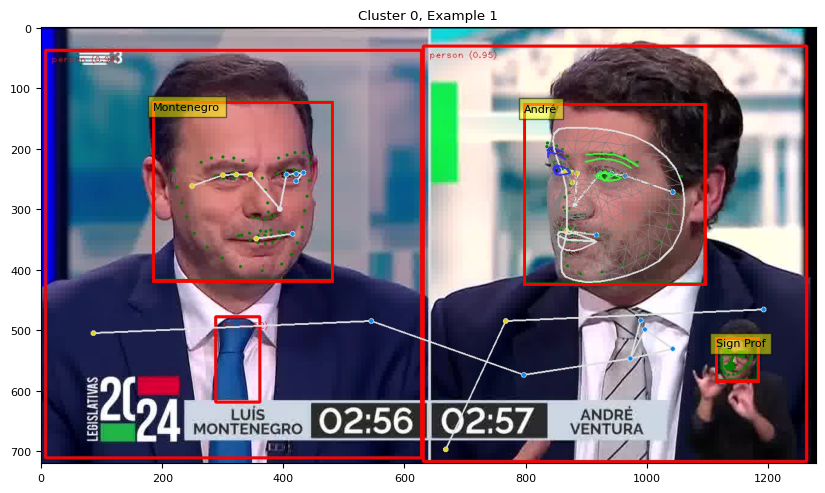

Example 2 - Image dimensions: width=1280, height=720
Example 2 - Montenegro bounding box: [184, 501, 135, 452]
Example 2 - André bounding box: [724, 1028, 178, 483]
Example 2 - Sign Prof bounding box: [1125, 1197, 510, 583]


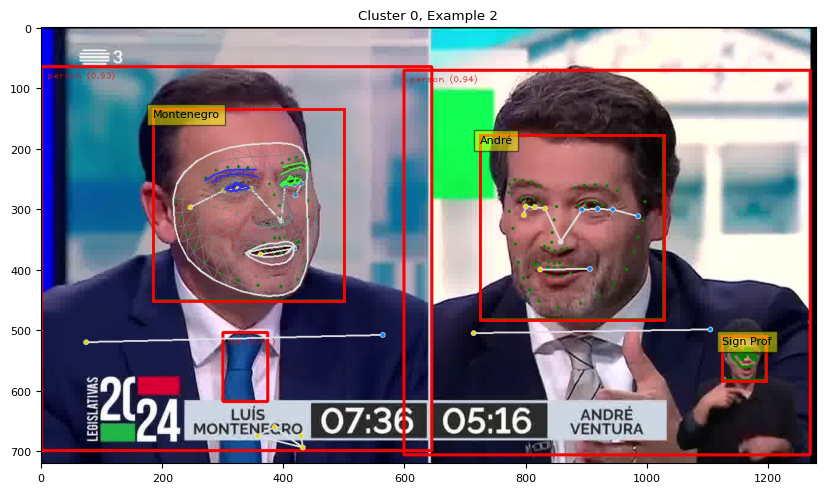

Example 3 - Image dimensions: width=1280, height=720
Example 3 - Montenegro bounding box: [188, 484, 129, 426]
Example 3 - André bounding box: [861, 1162, 93, 394]
Example 3 - Sign Prof bounding box: [1126, 1197, 514, 585]


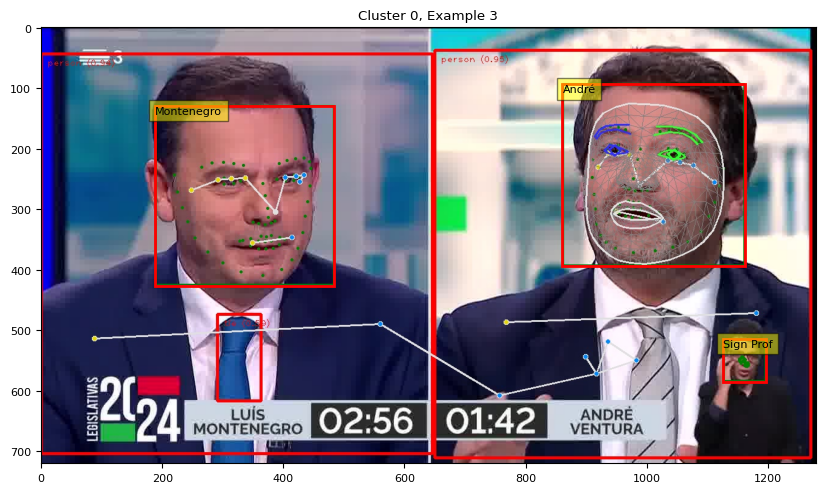

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Set a smaller font size for the annotations
plt.rcParams.update({'font.size': 8})

num_images_per_cluster = 3

# Select random indices from cluster 0 data
random_indices = np.random.choice(cluster_0_indices, min(num_images_per_cluster, len(cluster_0_indices)), replace=False)

for j, index in enumerate(random_indices):
    filename = data.iloc[index]['filename']
    image = plt.imread(os.path.join(r'C:\Users\User\Desktop\PBD\Code\processed\ad-chega', filename))
    image_height, image_width = image.shape[:2]
    
    fig, ax = plt.subplots(figsize=(10, 10))  
    ax.imshow(image)
    

    print(f"Example {j+1} - Image dimensions: width={image_width}, height={image_height}")
    

    bounding_boxes = data.iloc[index]['bounding_boxes']
    labels = cluster_0_data.loc[index, 'labels']


    if labels == ['Montenegro', 'André', 'Sign Prof']:
        montenegro_index = labels.index('Montenegro')
        andre_index = labels.index('André')
        sign_prof_index = labels.index('Sign Prof')
        
        montenegro_bbox = bounding_boxes[montenegro_index]
        andre_bbox = bounding_boxes[andre_index]
        sign_prof_bbox = bounding_boxes[sign_prof_index]
        
        if not (montenegro_bbox[0] < andre_bbox[0] < sign_prof_bbox[0]):

            sorted_indices = sorted(range(len(bounding_boxes)), key=lambda i: bounding_boxes[i][0])
            labels = [labels[i] for i in sorted_indices]
            bounding_boxes = [bounding_boxes[i] for i in sorted_indices]

    for bbox, label in zip(bounding_boxes, labels):
        x1, x2, y1, y2 = bbox

        print(f"Example {j+1} - {label} bounding box: {bbox}")
        

        ax.add_patch(patches.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=2))
        

        text_y = y1 if y1 > 10 else y1 + 10
        ax.text(x1, text_y, label, verticalalignment='top', bbox=dict(facecolor='yellow', alpha=0.5), fontsize=8)
    
    ax.set_title(f'Cluster 0, Example {j+1}')
    ax.axis('on') 
    plt.show()




Example 1 - Image dimensions: width=1280, height=720
Example 1 - Comentador bounding box: [616, 911, 173, 468]
Example 1 - Sign Prof bounding box: [1139, 1210, 508, 579]


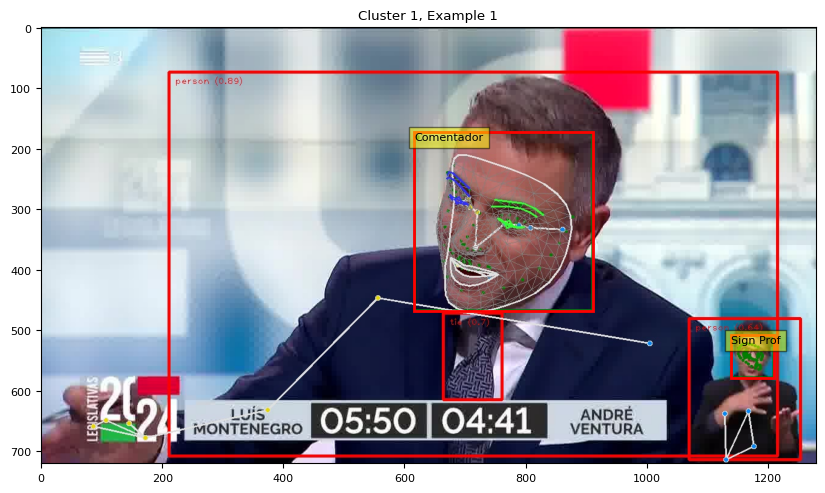

Example 2 - Image dimensions: width=1280, height=720
Example 2 - Comentador bounding box: [521, 830, 97, 406]
Example 2 - Sign Prof bounding box: [1132, 1200, 508, 577]


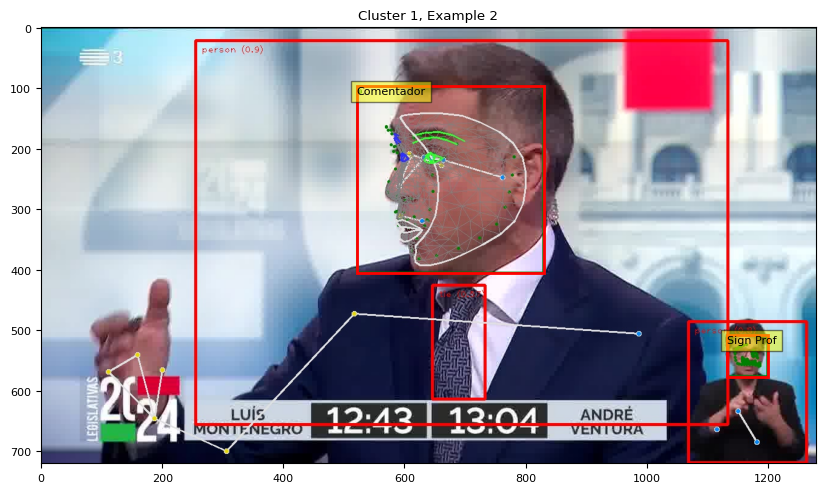

Example 3 - Image dimensions: width=1280, height=720
Example 3 - Comentador bounding box: [613, 912, 187, 487]
Example 3 - Sign Prof bounding box: [1152, 1223, 512, 584]


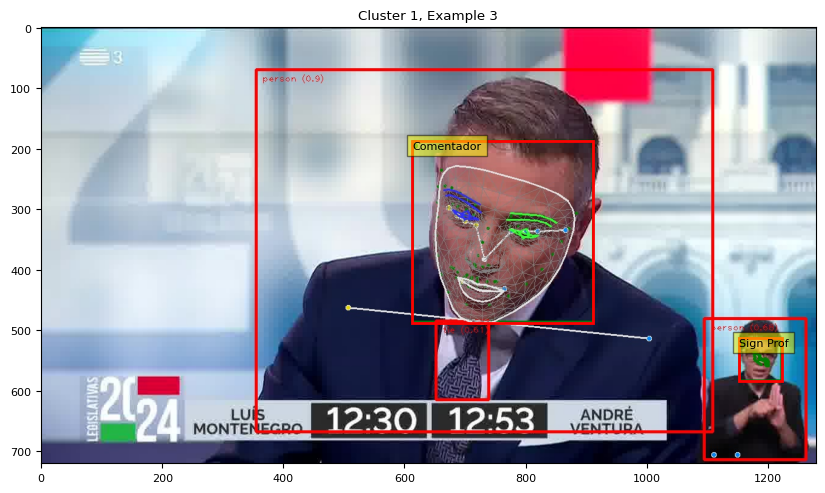

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Set a smaller font size for the annotations
plt.rcParams.update({'font.size': 8})

num_images_per_cluster = 3


random_indices = np.random.choice(cluster_1_indices, min(num_images_per_cluster, len(cluster_1_indices)), replace=False)

for j, index in enumerate(random_indices):
    filename = data.iloc[index]['filename']
    image = plt.imread(os.path.join(r'C:\Users\User\Desktop\PBD\Code\processed\ad-chega', filename))
    image_height, image_width = image.shape[:2]
    
    fig, ax = plt.subplots(figsize=(10, 10)) 
    ax.imshow(image)
    

    print(f"Example {j+1} - Image dimensions: width={image_width}, height={image_height}")
    

    bounding_boxes = data.iloc[index]['bounding_boxes']
    labels = cluster_1_data.loc[index, 'labels']


    if labels == ['Mariana', 'Moderador', 'Rui', 'Sign Prof']:

        sorted_indices = sorted(range(len(bounding_boxes)), key=lambda i: bounding_boxes[i][0])
        sorted_bounding_boxes = [bounding_boxes[i] for i in sorted_indices]
        sorted_labels = [labels[i] for i in sorted_indices]


        sorted_labels[0] = 'Mariana'
        sorted_labels[1] = 'Moderador'
        sorted_labels[2] = 'Rui'
        sorted_labels[3] = 'Sign Prof'

        bounding_boxes = sorted_bounding_boxes
        labels = sorted_labels

    for bbox, label in zip(bounding_boxes, labels):
        x1, x2, y1, y2 = bbox

        print(f"Example {j+1} - {label} bounding box: {bbox}")
        

        ax.add_patch(patches.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=2))
        

        text_y = y1 if y1 > 10 else y1 + 10
        ax.text(x1, text_y, label, verticalalignment='top', bbox=dict(facecolor='yellow', alpha=0.5), fontsize=8)
    
    ax.set_title(f'Cluster 1, Example {j+1}')
    ax.axis('on')  
    plt.show()



Example 1 - Image dimensions: width=1280, height=720
Example 1 - Montenegro bounding box: [190, 267, 122, 199]
Example 1 - Comentador bounding box: [640, 681, 157, 199]
Example 1 - André bounding box: [1000, 1062, 131, 194]
Example 1 - Sign Prof bounding box: [1130, 1201, 506, 578]


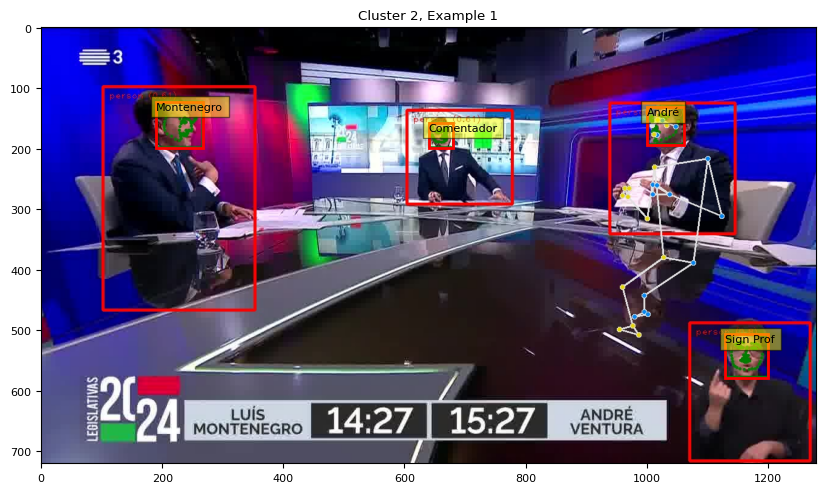

Example 2 - Image dimensions: width=1280, height=720
Example 2 - Montenegro bounding box: [246, 396, 105, 255]
Example 2 - Comentador bounding box: [660, 707, 164, 211]
Example 2 - André bounding box: [1055, 1109, 172, 227]
Example 2 - Sign Prof bounding box: [1116, 1184, 503, 572]


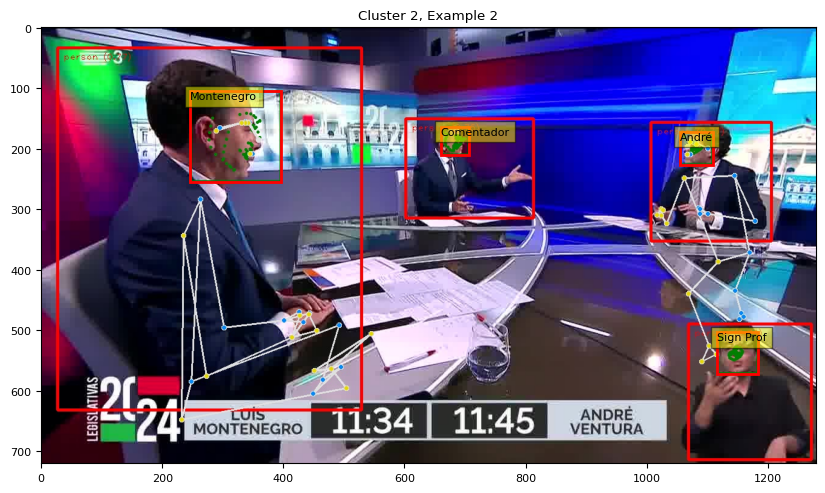

Example 3 - Image dimensions: width=1280, height=720
Example 3 - Montenegro bounding box: [261, 333, 116, 188]
Example 3 - Comentador bounding box: [688, 725, 145, 183]
Example 3 - André bounding box: [1016, 1077, 128, 190]
Example 3 - Sign Prof bounding box: [1132, 1204, 507, 579]


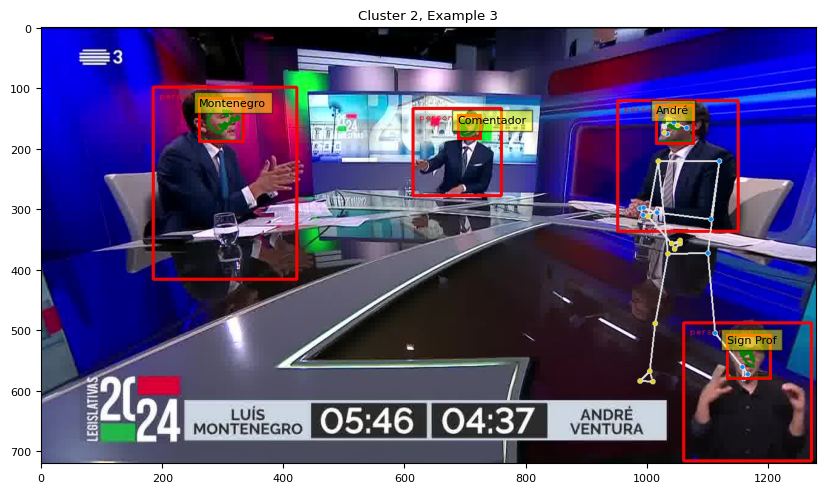

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os


plt.rcParams.update({'font.size': 8})

num_images_per_cluster = 3


random_indices = np.random.choice(cluster_2_indices, min(num_images_per_cluster, len(cluster_2_indices)), replace=False)

for j, index in enumerate(random_indices):
    filename = data.iloc[index]['filename']
    image = plt.imread(os.path.join(r'C:\Users\User\Desktop\PBD\Code\processed\ad-chega', filename))
    image_height, image_width = image.shape[:2]
    
    fig, ax = plt.subplots(figsize=(10, 10)) 
    ax.imshow(image)
    

    print(f"Example {j+1} - Image dimensions: width={image_width}, height={image_height}")


    bounding_boxes = data.iloc[index]['bounding_boxes']
    labels = cluster_2_data.loc[index, 'labels']


    if labels == ['Montenegro', 'Comentador', 'André', 'Sign Prof']:
        sorted_indices = sorted(range(len(bounding_boxes)), key=lambda i: bounding_boxes[i][0])
        sorted_bounding_boxes = [bounding_boxes[i] for i in sorted_indices]
        sorted_labels = [labels[i] for i in sorted_indices]


        sorted_labels[0] = 'Montenegro'
        sorted_labels[1] = 'Comentador'
        sorted_labels[2] = 'André'
        sorted_labels[3] = 'Sign Prof'

        bounding_boxes = sorted_bounding_boxes
        labels = sorted_labels

    for bbox, label in zip(bounding_boxes, labels):
        x1, x2, y1, y2 = bbox

        print(f"Example {j+1} - {label} bounding box: {bbox}")
        

        ax.add_patch(patches.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=2))
        

        text_y = y1 if y1 > 10 else y1 + 10
        ax.text(x1, text_y, label, verticalalignment='top', bbox=dict(facecolor='yellow', alpha=0.5), fontsize=8)
    
    ax.set_title(f'Cluster 2, Example {j+1}')
    ax.axis('on') 
    plt.show()


Example 1 - Image dimensions: width=1280, height=720
Example 1 - Montenegro bounding box: [457, 749, 135, 428]
Example 1 - Sign Prof bounding box: [1121, 1193, 508, 580]


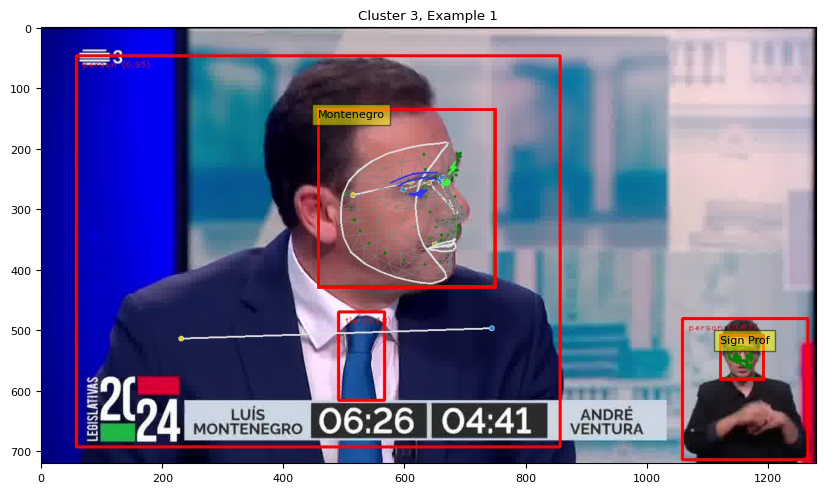

Example 2 - Image dimensions: width=1280, height=720
Example 2 - Montenegro bounding box: [325, 599, 177, 452]
Example 2 - Sign Prof bounding box: [1142, 1212, 505, 576]


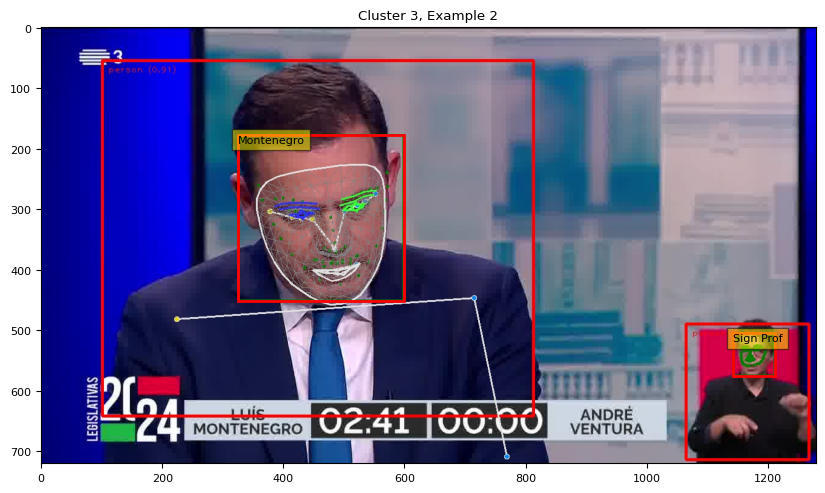

Example 3 - Image dimensions: width=1280, height=720
Example 3 - Montenegro bounding box: [373, 650, 162, 440]
Example 3 - Sign Prof bounding box: [1125, 1195, 505, 576]


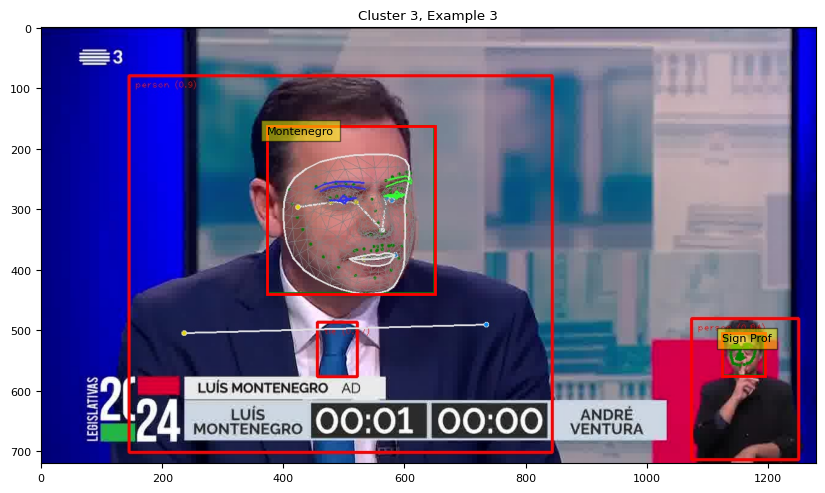

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os


plt.rcParams.update({'font.size': 8})

num_images_per_cluster = 3


random_indices = np.random.choice(cluster_3_indices, min(num_images_per_cluster, len(cluster_3_indices)), replace=False)

for j, index in enumerate(random_indices):
    filename = data.iloc[index]['filename']
    image = plt.imread(os.path.join(r'C:\Users\User\Desktop\PBD\Code\processed\ad-chega', filename))
    image_height, image_width = image.shape[:2]
    
    fig, ax = plt.subplots(figsize=(10, 10)) 
    ax.imshow(image)
    

    print(f"Example {j+1} - Image dimensions: width={image_width}, height={image_height}")
    

    bounding_boxes = data.iloc[index]['bounding_boxes']
    labels = cluster_3_data.loc[index, 'labels']


    if labels == ['Mariana', 'Moderador', 'Rui', 'Sign Prof']:
        sorted_indices = sorted(range(len(bounding_boxes)), key=lambda i: bounding_boxes[i][0])
        sorted_bounding_boxes = [bounding_boxes[i] for i in sorted_indices]
        sorted_labels = [labels[i] for i in sorted_indices]


        sorted_labels[0] = 'Mariana'
        sorted_labels[-1] = 'Sign Prof'
        

        remaining_labels = ['Moderador', 'Rui']
        remaining_sorted_indices = [i for i in range(len(sorted_labels)) if sorted_labels[i] not in ['Mariana', 'Sign Prof']]
        for k, remaining_label in enumerate(remaining_labels):
            sorted_labels[remaining_sorted_indices[k]] = remaining_label

        bounding_boxes = sorted_bounding_boxes
        labels = sorted_labels

    for bbox, label in zip(bounding_boxes, labels):
        x1, x2, y1, y2 = bbox

        print(f"Example {j+1} - {label} bounding box: {bbox}")
        

        ax.add_patch(patches.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=2))
        

        text_y = y1 if y1 > 10 else y1 + 10
        ax.text(x1, text_y, label, verticalalignment='top', bbox=dict(facecolor='yellow', alpha=0.5), fontsize=8)
    
    ax.set_title(f'Cluster 3, Example {j+1}')
    ax.axis('on')  
    plt.show()


Example 1 - Image dimensions: width=1280, height=720
Example 1 - André bounding box: [536, 849, 133, 446]
Example 1 - Sign Prof bounding box: [1118, 1189, 508, 579]


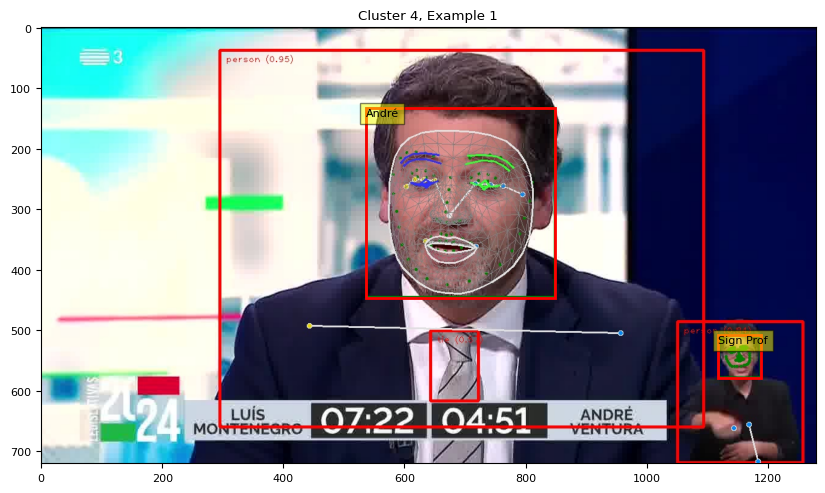

Example 2 - Image dimensions: width=1280, height=720
Example 2 - André bounding box: [485, 798, 90, 404]
Example 2 - Sign Prof bounding box: [1126, 1197, 505, 576]


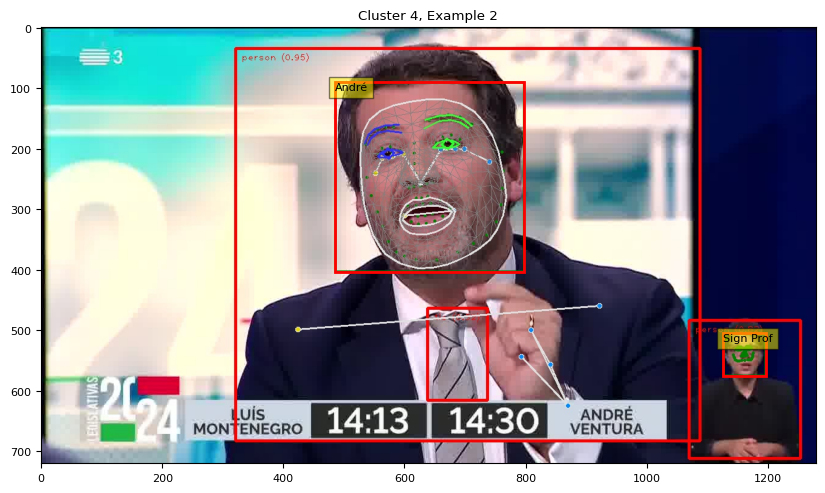

Example 3 - Image dimensions: width=1280, height=720
Example 3 - André bounding box: [550, 840, 95, 386]
Example 3 - Sign Prof bounding box: [1126, 1194, 505, 574]


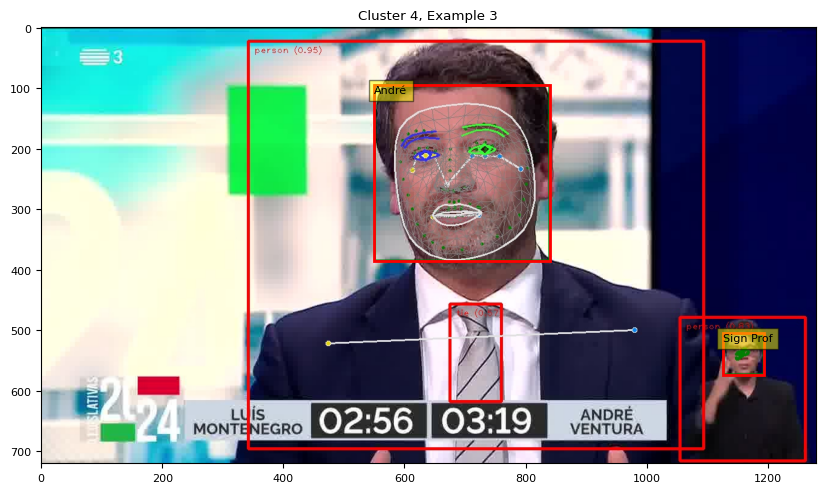

In [37]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os


plt.rcParams.update({'font.size': 8})

num_images_per_cluster = 3


random_indices = np.random.choice(cluster_4_indices, min(num_images_per_cluster, len(cluster_4_indices)), replace=False)

for j, index in enumerate(random_indices):
    filename = data.iloc[index]['filename']
    image = plt.imread(os.path.join(r'C:\Users\User\Desktop\PBD\Code\processed\ad-chega', filename))
    image_height, image_width = image.shape[:2]
    
    fig, ax = plt.subplots(figsize=(10, 10)) 
    ax.imshow(image)
    

    print(f"Example {j+1} - Image dimensions: width={image_width}, height={image_height}")
    

    bounding_boxes = data.iloc[index]['bounding_boxes']
    labels = cluster_4_data.loc[index, 'labels']


    sorted_indices = sorted(range(len(bounding_boxes)), key=lambda i: bounding_boxes[i][0])
    sorted_bounding_boxes = [bounding_boxes[i] for i in sorted_indices]
    sorted_labels = [labels[i] for i in sorted_indices]


    sorted_labels[0] = 'André'
    sorted_labels[-1] = 'Sign Prof'


    remaining_labels = ['Mariana', 'Moderador']
    remaining_sorted_indices = [i for i in range(len(sorted_labels)) if sorted_labels[i] not in ['André', 'Sign Prof']]

    for k, remaining_label in enumerate(remaining_labels):
        if k < len(remaining_sorted_indices):
            sorted_labels[remaining_sorted_indices[k]] = remaining_label

    bounding_boxes = sorted_bounding_boxes
    labels = sorted_labels

    for bbox, label in zip(bounding_boxes, labels):
        x1, x2, y1, y2 = bbox

        print(f"Example {j+1} - {label} bounding box: {bbox}")
        

        ax.add_patch(patches.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=2))
        

        text_y = y1 if y1 > 10 else y1 + 10
        ax.text(x1, text_y, label, verticalalignment='top', bbox=dict(facecolor='yellow', alpha=0.5), fontsize=8)
    
    ax.set_title(f'Cluster 4, Example {j+1}')
    ax.axis('on') 
    plt.show()



# 6-Gets the emotion and stores for each Cluster

In [40]:
import numpy as np
import pandas as pd
from collections import Counter

# Function to label speakers based on bounding box positions for Cluster 0
def label_speakers_cluster_0(bounding_boxes):
    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])  
    labels = ['Montenegro', 'André', 'Sign Prof']  
    return labels


def label_speakers_cluster_1(bounding_boxes):
    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])
    labels = ['Moderador', 'Sign Prof']
    return labels


def label_speakers_cluster_2(bounding_boxes):
    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])
    labels = ['Montenegro', 'Moderador', 'André', 'Sign Prof']
    return labels


def label_speakers_cluster_3(bounding_boxes):
    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])
    labels = ['Montenegro', 'Sign Prof']
    return labels


def label_speakers_cluster_4(bounding_boxes):
    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])
    labels = ['André', 'Sign Prof']
    return labels

# Function to extract emotions and associate them with speakers
def extract_emotions(data, cluster_labels, cluster_number):
    emotions_per_speaker = {'Montenegro': [], 'Moderador': [], 'André': [], 'Sign Prof': []}

    cluster_indices = np.where(cluster_labels == cluster_number)[0]
    cluster_data = data.iloc[cluster_indices]

    for index, row in cluster_data.iterrows():
        bounding_boxes = row['bounding_boxes']
        emotions = [face_data['emotion'] for face_data in row['fer']]
        labels = row['labels']


        if isinstance(labels, list) and isinstance(emotions, list):
 
            if cluster_number == 0 and labels == ['Montenegro', 'André', 'Sign Prof']:
                montenegro_index = labels.index('Montenegro')
                andre_index = labels.index('André')
                if bounding_boxes[montenegro_index][0] > bounding_boxes[andre_index][0]:
  
                    labels[montenegro_index], labels[andre_index] = labels[andre_index], labels[montenegro_index]
                    emotions[montenegro_index], emotions[andre_index] = emotions[andre_index], emotions[montenegro_index]

            for label, emotion in zip(labels, emotions):
                if label in emotions_per_speaker:
                    emotions_per_speaker[label].append(emotion)

    return emotions_per_speaker


# Add labels to cluster data
for cluster_number in range(len(np.unique(cluster_labels))):
    if cluster_number == 0:
        cluster_indices = np.where(cluster_labels == cluster_number)[0]
        cluster_data = data.iloc[cluster_indices].copy()
        cluster_data.loc[:, 'labels'] = cluster_data['bounding_boxes'].apply(label_speakers_cluster_0)
        data.loc[cluster_indices, 'labels'] = cluster_data['labels']
    elif cluster_number == 1:
        cluster_indices = np.where(cluster_labels == cluster_number)[0]
        cluster_data = data.iloc[cluster_indices].copy()
        cluster_data.loc[:, 'labels'] = cluster_data['bounding_boxes'].apply(label_speakers_cluster_1)
        data.loc[cluster_indices, 'labels'] = cluster_data['labels']
    elif cluster_number == 2:
        cluster_indices = np.where(cluster_labels == cluster_number)[0]
        cluster_data = data.iloc[cluster_indices].copy()
        cluster_data.loc[:, 'labels'] = cluster_data['bounding_boxes'].apply(label_speakers_cluster_2)
        data.loc[cluster_indices, 'labels'] = cluster_data['labels']
    elif cluster_number == 3:
        cluster_indices = np.where(cluster_labels == cluster_number)[0]
        cluster_data = data.iloc[cluster_indices].copy()
        cluster_data.loc[:, 'labels'] = cluster_data['bounding_boxes'].apply(label_speakers_cluster_3)
        data.loc[cluster_indices, 'labels'] = cluster_data['labels']
    elif cluster_number == 4:
        cluster_indices = np.where(cluster_labels == cluster_number)[0]
        cluster_data = data.iloc[cluster_indices].copy()
        cluster_data.loc[:, 'labels'] = cluster_data['bounding_boxes'].apply(label_speakers_cluster_4)
        data.loc[cluster_indices, 'labels'] = cluster_data['labels']


num_clusters = len(np.unique(cluster_labels))


all_emotions_per_speaker = []
for cluster_number in range(num_clusters):
    emotions_per_speaker = extract_emotions(data, cluster_labels, cluster_number)
    all_emotions_per_speaker.append(emotions_per_speaker)

# Count emotions for all clusters
def count_emotions(emotions_per_speaker):
    counts_per_speaker = {}
    for speaker, emotions in emotions_per_speaker.items():
        counts_per_speaker[speaker] = dict(Counter(emotions))
    return counts_per_speaker

for cluster_number, emotions_per_speaker in enumerate(all_emotions_per_speaker):
    counts_per_speaker = count_emotions(emotions_per_speaker)
    print(f"Cluster {cluster_number} Emotions:")
    for speaker, counts in counts_per_speaker.items():
        print(f"{speaker}: {counts}")



Cluster 0 Emotions:
Montenegro: {'Neutral': 56, 'Contempt': 439, 'Anger': 262, 'Surprise': 118, 'Happiness': 42, 'Sadness': 93, 'Disgust': 17, 'Fear': 1}
Moderador: {}
André: {'Anger': 38, 'Surprise': 556, 'Neutral': 92, 'Sadness': 211, 'Happiness': 23, 'Contempt': 105, 'Disgust': 3}
Sign Prof: {'Fear': 204, 'Surprise': 111, 'Sadness': 174, 'Anger': 268, 'Disgust': 157, 'Neutral': 114}
Cluster 1 Emotions:
Montenegro: {}
Moderador: {'Neutral': 17, 'Contempt': 50, 'Surprise': 77, 'Anger': 6, 'Disgust': 13, 'Happiness': 27, 'Sadness': 4}
André: {}
Sign Prof: {'Fear': 13, 'Sadness': 40, 'Happiness': 4, 'Neutral': 33, 'Anger': 32, 'Disgust': 31, 'Surprise': 16, 'Contempt': 2}
Cluster 2 Emotions:
Montenegro: {'Fear': 24, 'Disgust': 31, 'Neutral': 52, 'Sadness': 51, 'Surprise': 15, 'Anger': 38, 'Happiness': 10, 'Contempt': 7}
Moderador: {'Disgust': 36, 'Sadness': 42, 'Neutral': 66, 'Anger': 32, 'Contempt': 21, 'Surprise': 20, 'Fear': 9, 'Happiness': 2}
André: {'Sadness': 48, 'Neutral': 75, 'D

# 7-Sums the emotions of each speaker in each cluster

In [42]:
from collections import Counter

# Função para agregar e somar emoções de todos os clusters
def aggregate_and_sum_emotions(all_emotions_per_speaker):
    aggregated_emotions = {'Montenegro': Counter(), 'Moderador': Counter(), 'André': Counter(), 'Sign Prof': Counter()}

    for emotions_per_speaker in all_emotions_per_speaker:
        for speaker, emotions in emotions_per_speaker.items():
            aggregated_emotions[speaker].update(emotions)

    # Converter Counter para dicionário para uma saída mais legível
    aggregated_emotions = {speaker: dict(emotion_counts) for speaker, emotion_counts in aggregated_emotions.items()}
    return aggregated_emotions

# Agregar e somar emoções para cada locutor em todos os clusters
aggregated_emotions = aggregate_and_sum_emotions(all_emotions_per_speaker)

# Print the aggregated and summed emotions for each speaker
print("Aggregated Emotions for All Speakers Across All Clusters:")
for speaker, emotion_counts in aggregated_emotions.items():
    print(f"{speaker}: {emotion_counts}")


Aggregated Emotions for All Speakers Across All Clusters:
Montenegro: {'Neutral': 180, 'Contempt': 490, 'Anger': 659, 'Surprise': 229, 'Happiness': 53, 'Sadness': 181, 'Disgust': 57, 'Fear': 25}
Moderador: {'Neutral': 83, 'Contempt': 71, 'Surprise': 97, 'Anger': 38, 'Disgust': 49, 'Happiness': 29, 'Sadness': 46, 'Fear': 9}
André: {'Anger': 65, 'Surprise': 750, 'Neutral': 199, 'Sadness': 309, 'Happiness': 31, 'Contempt': 146, 'Disgust': 33, 'Fear': 15}
Sign Prof: {'Fear': 356, 'Surprise': 242, 'Sadness': 414, 'Anger': 570, 'Disgust': 327, 'Neutral': 379, 'Happiness': 9, 'Contempt': 3}


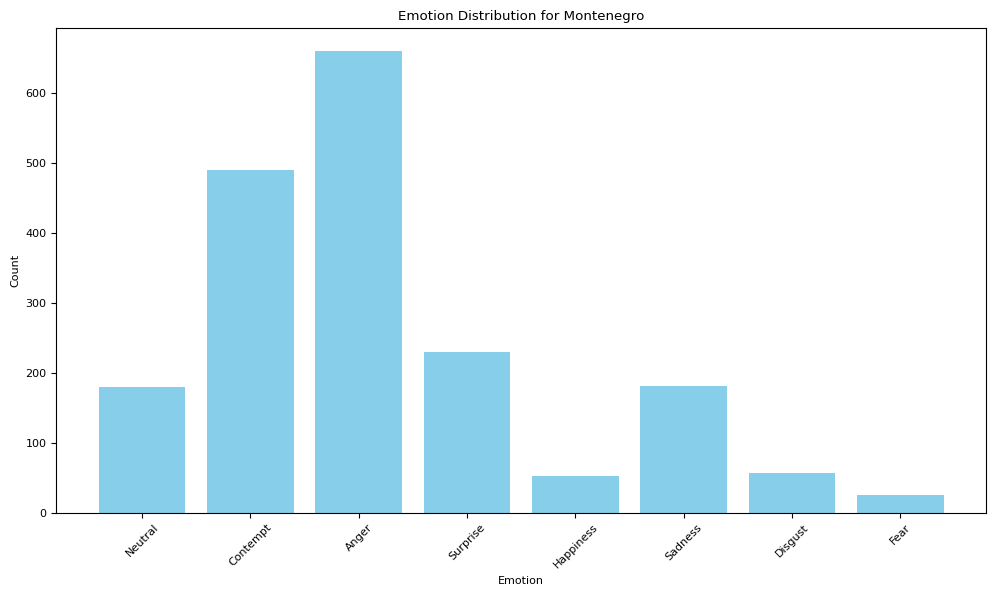

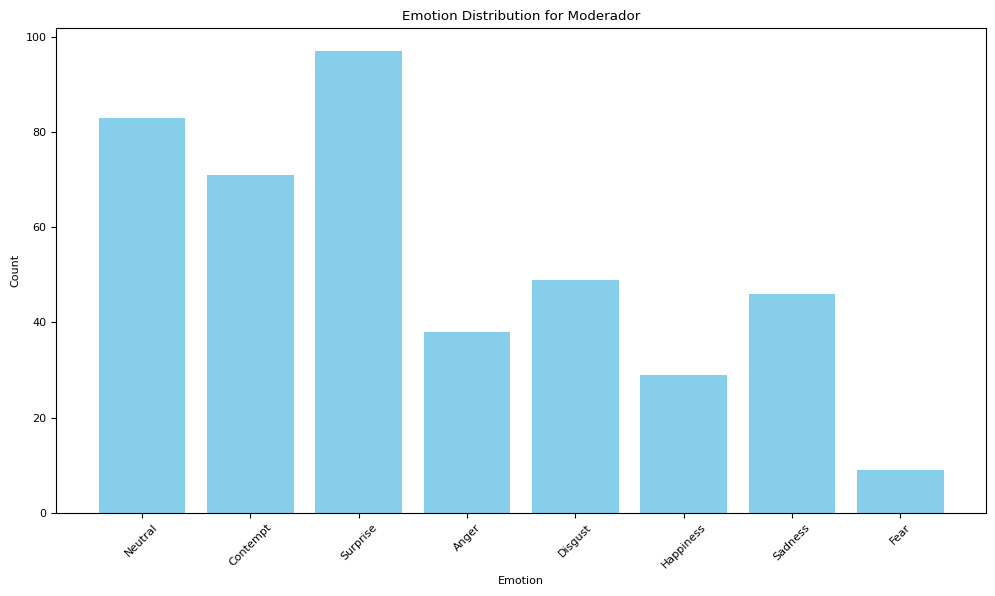

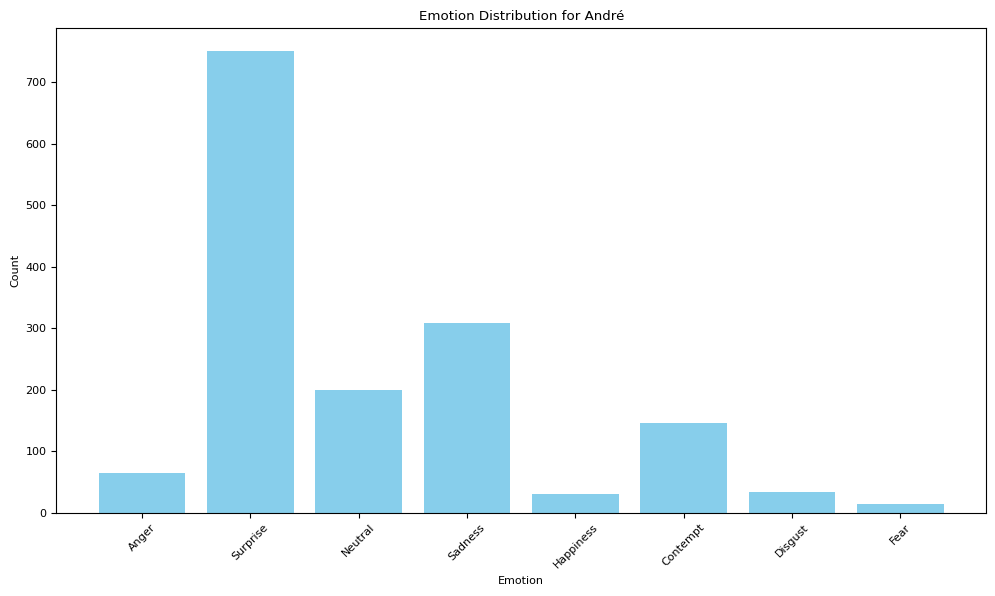

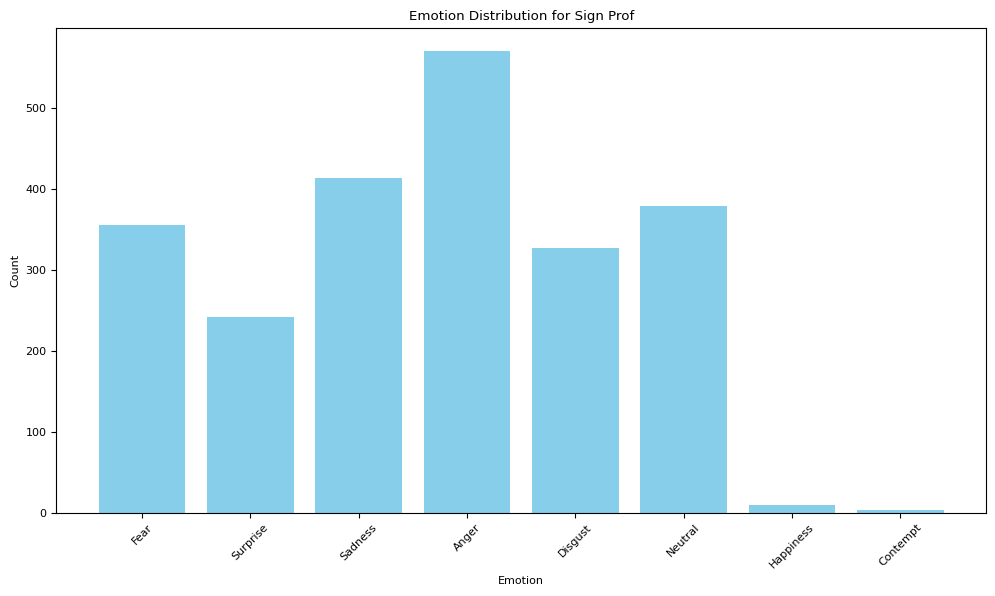

In [43]:
import matplotlib.pyplot as plt

# Função para plotar histogramas
def plot_histograms(aggregated_emotions):
    for speaker, emotion_counts in aggregated_emotions.items():
        emotions = list(emotion_counts.keys())
        counts = list(emotion_counts.values())
        
        plt.figure(figsize=(10, 6))
        plt.bar(emotions, counts, color='skyblue')
        plt.title(f'Emotion Distribution for {speaker}')
        plt.xlabel('Emotion')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Plotar histogramas para cada locutor
plot_histograms(aggregated_emotions)




In [27]:
# Contar o número de frames em cada cluster
num_clusters = len(np.unique(cluster_labels))

for cluster_number in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster_number)[0]
    num_frames_cluster = len(cluster_indices)
    print(f"Number of frames in Cluster {cluster_number}: {num_frames_cluster}")



Number of frames in Cluster 0: 886
Number of frames in Cluster 1: 119
Number of frames in Cluster 2: 474
Number of frames in Cluster 3: 322
Number of frames in Cluster 4: 112
